Preprocessing for Screening Stage Cancer vs healthy

Import operating system, numpy, pandas, matplotlib, statsmodels, random libraries

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib as mp 
import statsmodels.api as sm 
import random

Set seed to ensure reproducability

In [29]:
random.seed(123)


Load train and test datatsets and carry out visualisation

In [ ]:
trainp_data = pd.read_csv('Train_Set.csv') 
testp_data = pd.read_csv('Test_Set.csv')
print(trainp_data.head(5)) # information on first five data points
print(testp_data.head(5)) # information on first five data points
print(trainp_data.shape) # dimensions of train data set
print(testp_data.shape) # dimensions of test data set
print(trainp_data.describe()) # statistical information on train data set
print(testp_data.describe()) # statistical information on test data set

Check for missing data points in train and test data

In [ ]:
print(trainp_data.isna().sum()) # check how many data points missing
print(trainp_data.iloc[:, -1]) # view response variable (status of cancer)
print(trainp_data['class_label'].value_counts()) # inspect distribution of response variable (status of cancer)
print(testp_data.isna().sum()) # check how many data points missing
print(testp_data.iloc[:, -1]) # view response variable (status of cancer)
print(testp_data['class_label'].value_counts()) # inspect distribution of response variable (status of cancer)

Remove irrelevant classes from train and test data that are not either healthy or screening stage cancer

In [32]:
trainp_data = trainp_data[(trainp_data['class_label'] == 'healthy') | (trainp_data['class_label'] == 'screening stage cancer')] # remove non he;lathy and non screening stage cancer classes
trainp_data.reset_index(drop=True, inplace=True)
print(trainp_data['class_label'].value_counts()) 
testp_data = trainp_data[(testp_data['class_label'] == 'healthy') | 
(testp_data['class_label'] == 'screening stage cancer')] # remove non he;lathy and non screening stage cancer classes
testp_data.reset_index(drop=True, inplace=True)
print(testp_data['class_label'].value_counts()) 

class_label
screening stage cancer    490
healthy                    60
Name: count, dtype: int64
class_label
screening stage cancer    100
healthy                    46
Name: count, dtype: int64


/var/folders/y0/l997zpqn1n71_t9f81b1qxv00000gn/T/ipykernel_8066/909148494.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  testp_data = trainp_data[(testp_data['class_label'] == 'healthy') |


Extract independent and dependent features from train and test datasets

In [33]:
xvals_train = trainp_data.iloc[:, 0:350] # access train x values
yvals_train = trainp_data.iloc[:,350] # access train y values
xvals_test = testp_data.iloc[:, 0:350] # access test x values
yvals_test = testp_data.iloc[:, 350] # access test x values

Standardising x values in train and test dataset

In [34]:
from sklearn.preprocessing import StandardScaler 
std_x = StandardScaler() # initialise StandardScaler
xvals_train_std = std_x.fit_transform(xvals_train) # standardise x values of train dataset
xvals_test_std = std_x.fit_transform(xvals_test) # standardise x values of test dataset

Convert y variables to binary for test and train data set as neccessary

In [35]:
yvals_train_binary = yvals_train.map({'screening stage cancer': 1, 'healthy': 0}) # Convert "cancer" to 1 and "healthy" to 0
print(yvals_train_binary.unique()) 
yvals_test_binary = yvals_test.map({'screening stage cancer': 1, 'healthy': 0}) # Convert "cancer" to 1 and "healthy" to 0
print(yvals_train_binary.unique()) 

[0 1]
[0 1]


Technique to remove regressors:

Perform L1 (lasso) regularisation to logistic regression model to idenitify insignifcant regressors with coefficients equals to zero

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')  # specify solver for L1 regularization
log_reg_l1.fit(xvals_train_std, yvals_train_binary)  # train model
significant_features_1 = list(xvals_train.columns[log_reg_l1.coef_[0] != 0]) # check if there are any signifcant features identified
insignificant_features_1 = list(xvals_train.columns[log_reg_l1.coef_[0] == 0]) # identify insignifcant features
print(len(insignificant_features_1) + len(significant_features_1)) # check if total number of features is 350
print(insignificant_features_1) # identify insiginficant features identified with this technique

350
['length_51', 'length_52', 'length_54', 'length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'lengt

Perform principal component analysis to identify insignifcant regressors that contribute little to variance

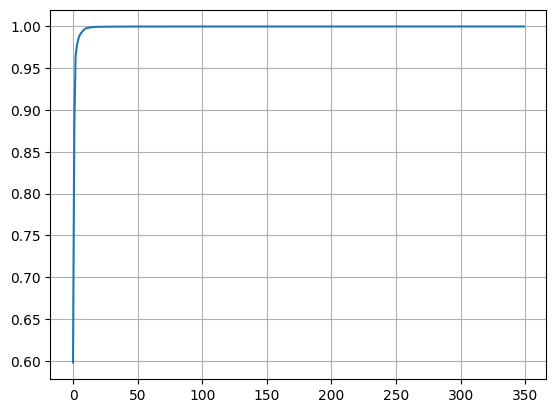

In [37]:
from sklearn.decomposition import PCA 
pca = PCA() # initialise PCA with default parameters
x_pca = pca.fit_transform(xvals_train_std) # compute principal components and transforms data into new feature space
explained_variance_ratio = pca.explained_variance_ratio_  # Get explained variance ratio for each component
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio) # sum computed variance for certain number of components
import matplotlib.pyplot as plt
plt.plot(cumulative_explained_variance_ratio) # plot cumulative explained variance ratio
plt.grid(True) # add grid to the plot
plt.show() # show graph

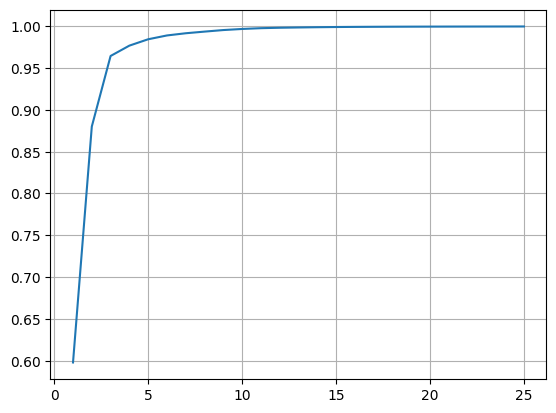

In [38]:
chosen_num_components = 25  # plateu cannot be read accurately so limit x axis to [0,25] and plot again
plt.plot(range(1, chosen_num_components + 1), cumulative_explained_variance_ratio[:chosen_num_components])
plt.grid(True) # add grid to the plot
plt.show() # plateu can be read 

In [48]:
chosen_num_components = 3 # there is little to no change in cumulative variance when more than 3 principal components are involved in calculations
pca = PCA(n_components = chosen_num_components) # initialise new pca with no of components = 3
x_pca = pca.fit_transform(xvals_train_std) # compute principal components and transforms data into new feature space

In [49]:
original_features = xvals_train.columns # all features
significant_feature_indices = np.where(cumulative_explained_variance_ratio <= 0.95)[0] # identify festures that are responsible for 95 percent of variance
significant_features_2 = list(original_features[significant_feature_indices])
insignificant_feature_indices = np.where(cumulative_explained_variance_ratio > 0.95)[0]
insignificant_features_2 = list(original_features[insignificant_feature_indices])
print(len(insignificant_features_2) + len(significant_features_2)) # check if total number of features is 350
print(insignificant_features_2) # identify insiginficant features identified with this technique

350
['length_53', 'length_54', 'length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'lengt

Perform recursive feature selection (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # use logistic regression as estimator function to perfom RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1) # 3 features selected as idenitified from PCA earlier
rfe.fit(xvals_train_std, yvals_train_binary) # identify rank of importance of features by comparing hyperparameters identified from the logistic regression model
significant_features_3 = list(xvals_train.columns[rfe.support_])
insignificant_features_3 = list(xvals_train.columns[~rfe.support_])
print(len(insignificant_features_3) + len(significant_features_3)) # check if total number of features is 350
print(insignificant_features_3) # identify insiginficant features identified with this technique



Perform correlation analysis to identify insignifcant regressors that are are highly correlated

In [51]:
correlation_matrix = xvals_train.corr() # find correlation coefficients between each pair of variables
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # mask to consider only the upper triangular matrix and ignore correlation between the same variable. Output is true and false
correlation_matrix = correlation_matrix.mask(mask) # apply mask to correlation matrix

In [52]:
for i in range(len(correlation_matrix.columns)): # Loop through the columnns
    for j in range(i): # Loop through the rows
        significant_features_4 = list(xvals_train.columns)
        insignificant_features_4 = []
        lengths_of_significant_features = []
        for threshold_int in range(70, 101):
            threshold_float = threshold_int / 100.0
            if abs(correlation_matrix.iloc[i, j]) > threshold_float:  # Adjust the threshold as needed. Set 0.8 here
                colname_i = correlation_matrix.columns[i] # first compared feature
                colname_j = correlation_matrix.columns[j] # second compared feature
                if colname_i in significant_features_4:
                    significant_features_4.remove(colname_i) # update the significant features
                if colname_i not in insignificant_features_4:
                    insignificant_features_4.append(colname_i) # update the siugnifcant features
            lengths_of_significant_features.append((threshold_float, len(significant_features_4)))

print(lengths_of_significant_features) # can be seen that the number of features do not change when threshold chosen bewteen 0.7 and 0.9. Therefore any threshold can be selected for this



[(0.7, 349), (0.71, 349), (0.72, 349), (0.73, 349), (0.74, 349), (0.75, 349), (0.76, 349), (0.77, 349), (0.78, 349), (0.79, 349), (0.8, 349), (0.81, 349), (0.82, 349), (0.83, 349), (0.84, 349), (0.85, 349), (0.86, 349), (0.87, 349), (0.88, 349), (0.89, 349), (0.9, 349), (0.91, 349), (0.92, 349), (0.93, 349), (0.94, 349), (0.95, 349), (0.96, 349), (0.97, 349), (0.98, 349), (0.99, 349), (1.0, 349)]


In [53]:
for i in range(len(correlation_matrix.columns)): # Loop through the columnns
    for j in range(i): # Loop through the rows
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed. Set 0.8 here
            colname_i = correlation_matrix.columns[i] # first compared feature
            colname_j = correlation_matrix.columns[j] # second compared feature
            if colname_i in significant_features_4:
                significant_features_4.remove(colname_i) # update the significant features
            if colname_i not in insignificant_features_4:
                insignificant_features_4.append(colname_i) # update the siugnifcant features

print(len(insignificant_features_4) + len(significant_features_4))
print(insignificant_features_4)

350
['length_400', 'length_52', 'length_53', 'length_54', 'length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length

Decide which features to remove

Check lengths of features to be removed

In [54]:

removables = {}

def update_to_remove(insignificant_features):
    for feature in insignificant_features:
        if feature not in removables:
            removables[feature] = 0
        removables[feature] += 1
    return removables

update_to_remove(insignificant_features_1)
update_to_remove(insignificant_features_2)
update_to_remove(insignificant_features_3)
update_to_remove(insignificant_features_4)

{'length_51': 2,
 'length_52': 3,
 'length_54': 4,
 'length_55': 4,
 'length_56': 4,
 'length_57': 4,
 'length_58': 4,
 'length_59': 4,
 'length_60': 3,
 'length_61': 4,
 'length_62': 4,
 'length_63': 4,
 'length_64': 4,
 'length_65': 4,
 'length_66': 4,
 'length_67': 4,
 'length_68': 4,
 'length_69': 4,
 'length_70': 4,
 'length_71': 4,
 'length_72': 4,
 'length_73': 4,
 'length_74': 4,
 'length_75': 4,
 'length_76': 4,
 'length_77': 4,
 'length_78': 4,
 'length_79': 4,
 'length_81': 4,
 'length_82': 4,
 'length_83': 4,
 'length_84': 4,
 'length_85': 4,
 'length_86': 4,
 'length_87': 4,
 'length_88': 4,
 'length_89': 4,
 'length_90': 4,
 'length_91': 4,
 'length_92': 4,
 'length_93': 4,
 'length_94': 4,
 'length_95': 4,
 'length_96': 4,
 'length_97': 4,
 'length_98': 4,
 'length_99': 4,
 'length_100': 4,
 'length_101': 4,
 'length_102': 4,
 'length_103': 4,
 'length_104': 4,
 'length_105': 4,
 'length_106': 4,
 'length_107': 4,
 'length_108': 4,
 'length_109': 4,
 'length_110': 4,
 'l

Find how many appearences the features appear in insiginficant features


In [55]:
drops_2 = []
drops_3 = []
drops_4 = []

for feature in removables:
    if removables[feature] >= 2:
        drops_2.append(feature)
    if removables[feature] >= 3:
        drops_3.append(feature)
    if removables[feature] >= 4:
        drops_4.append(feature)

print(len(drops_2)) # 350 variables removed # 0 variables preserved
print(len(drops_3)) # 347 variables removed # 3 variables preserved
print(len(drops_4)) # 332 variables remnoved # 18 variables preserved, Most optimal number of features to be preserved

350
347
332


Update data set by removing features in drop 3

In [58]:
### features in drops4 removed from train data set
xvals_train_filtered = xvals_train.drop(columns=drops_4)
print(xvals_train_filtered.shape)

### features in drops4 removed from test data set
xvals_test_filtered = xvals_test.drop(columns=drops_4)
print(xvals_train_filtered.shape)


# xvals_train_filtered to be used as dependent variables used to build the model
# xvals_test_filtered to be used as dependent variables used to build the model

# xvals_train_std are the standardised dependent values
# xvals_test_std are the standardised dependent values

# yvals_train_binary are the binary values for the response variable
# yvals_test_binary are the binary values for the response variable

### oriignal data
# xvals_train is the train set dependent variables
# xvals_test is the test set dependent variables
# yvals_train is the train set independent variables
# yvals_test is the test set independent variables





(550, 18)
(550, 18)
